In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Generate the time series X_t = N_t + t
np.random.seed(42)  # For reproducibility
t_values = np.arange(100)+1  # Time steps
N_t = np.random.normal(0, 1, len(t_values))  # White noise process
X_t = N_t + t_values  # Time series definition




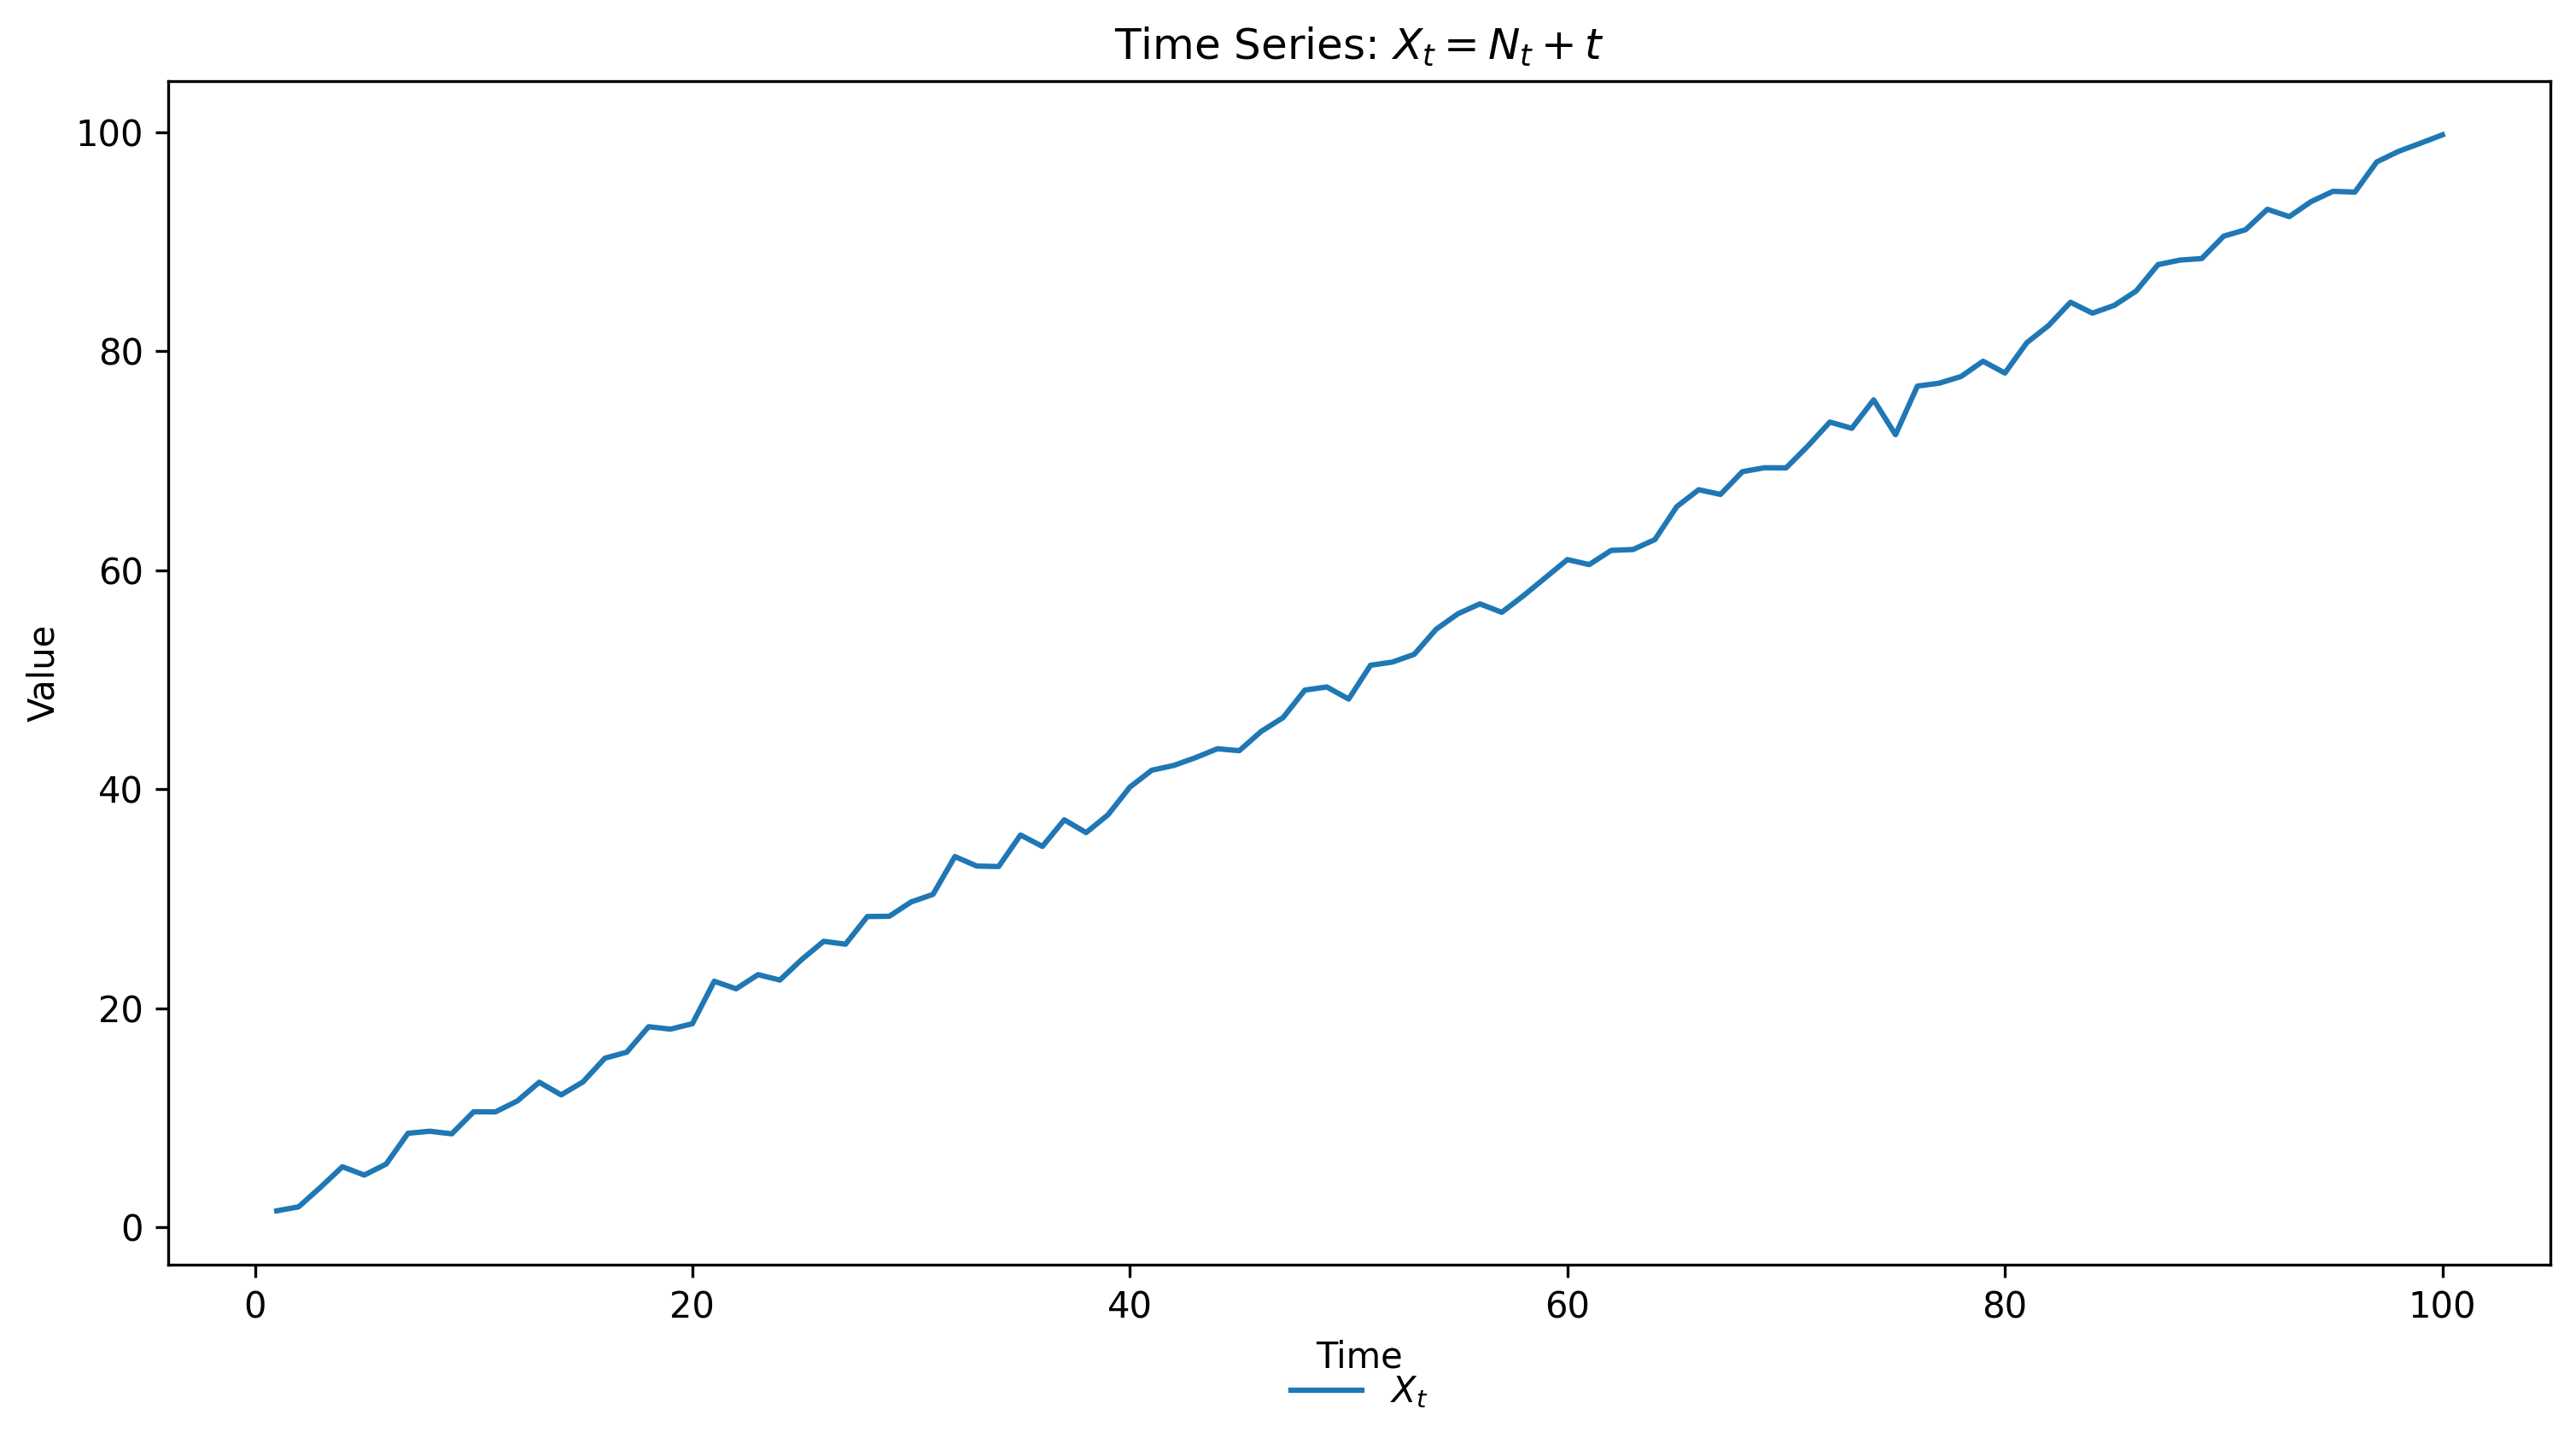

In [5]:
# Plot the time series
plt.figure(figsize=(12, 6), dpi=300, facecolor='none')
plt.plot(t_values, X_t, label="$X_t$")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Time Series: $X_t = N_t + t$")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), frameon=False)
plt.savefig("time_series.png", transparent=True, bbox_inches='tight')
plt.show()


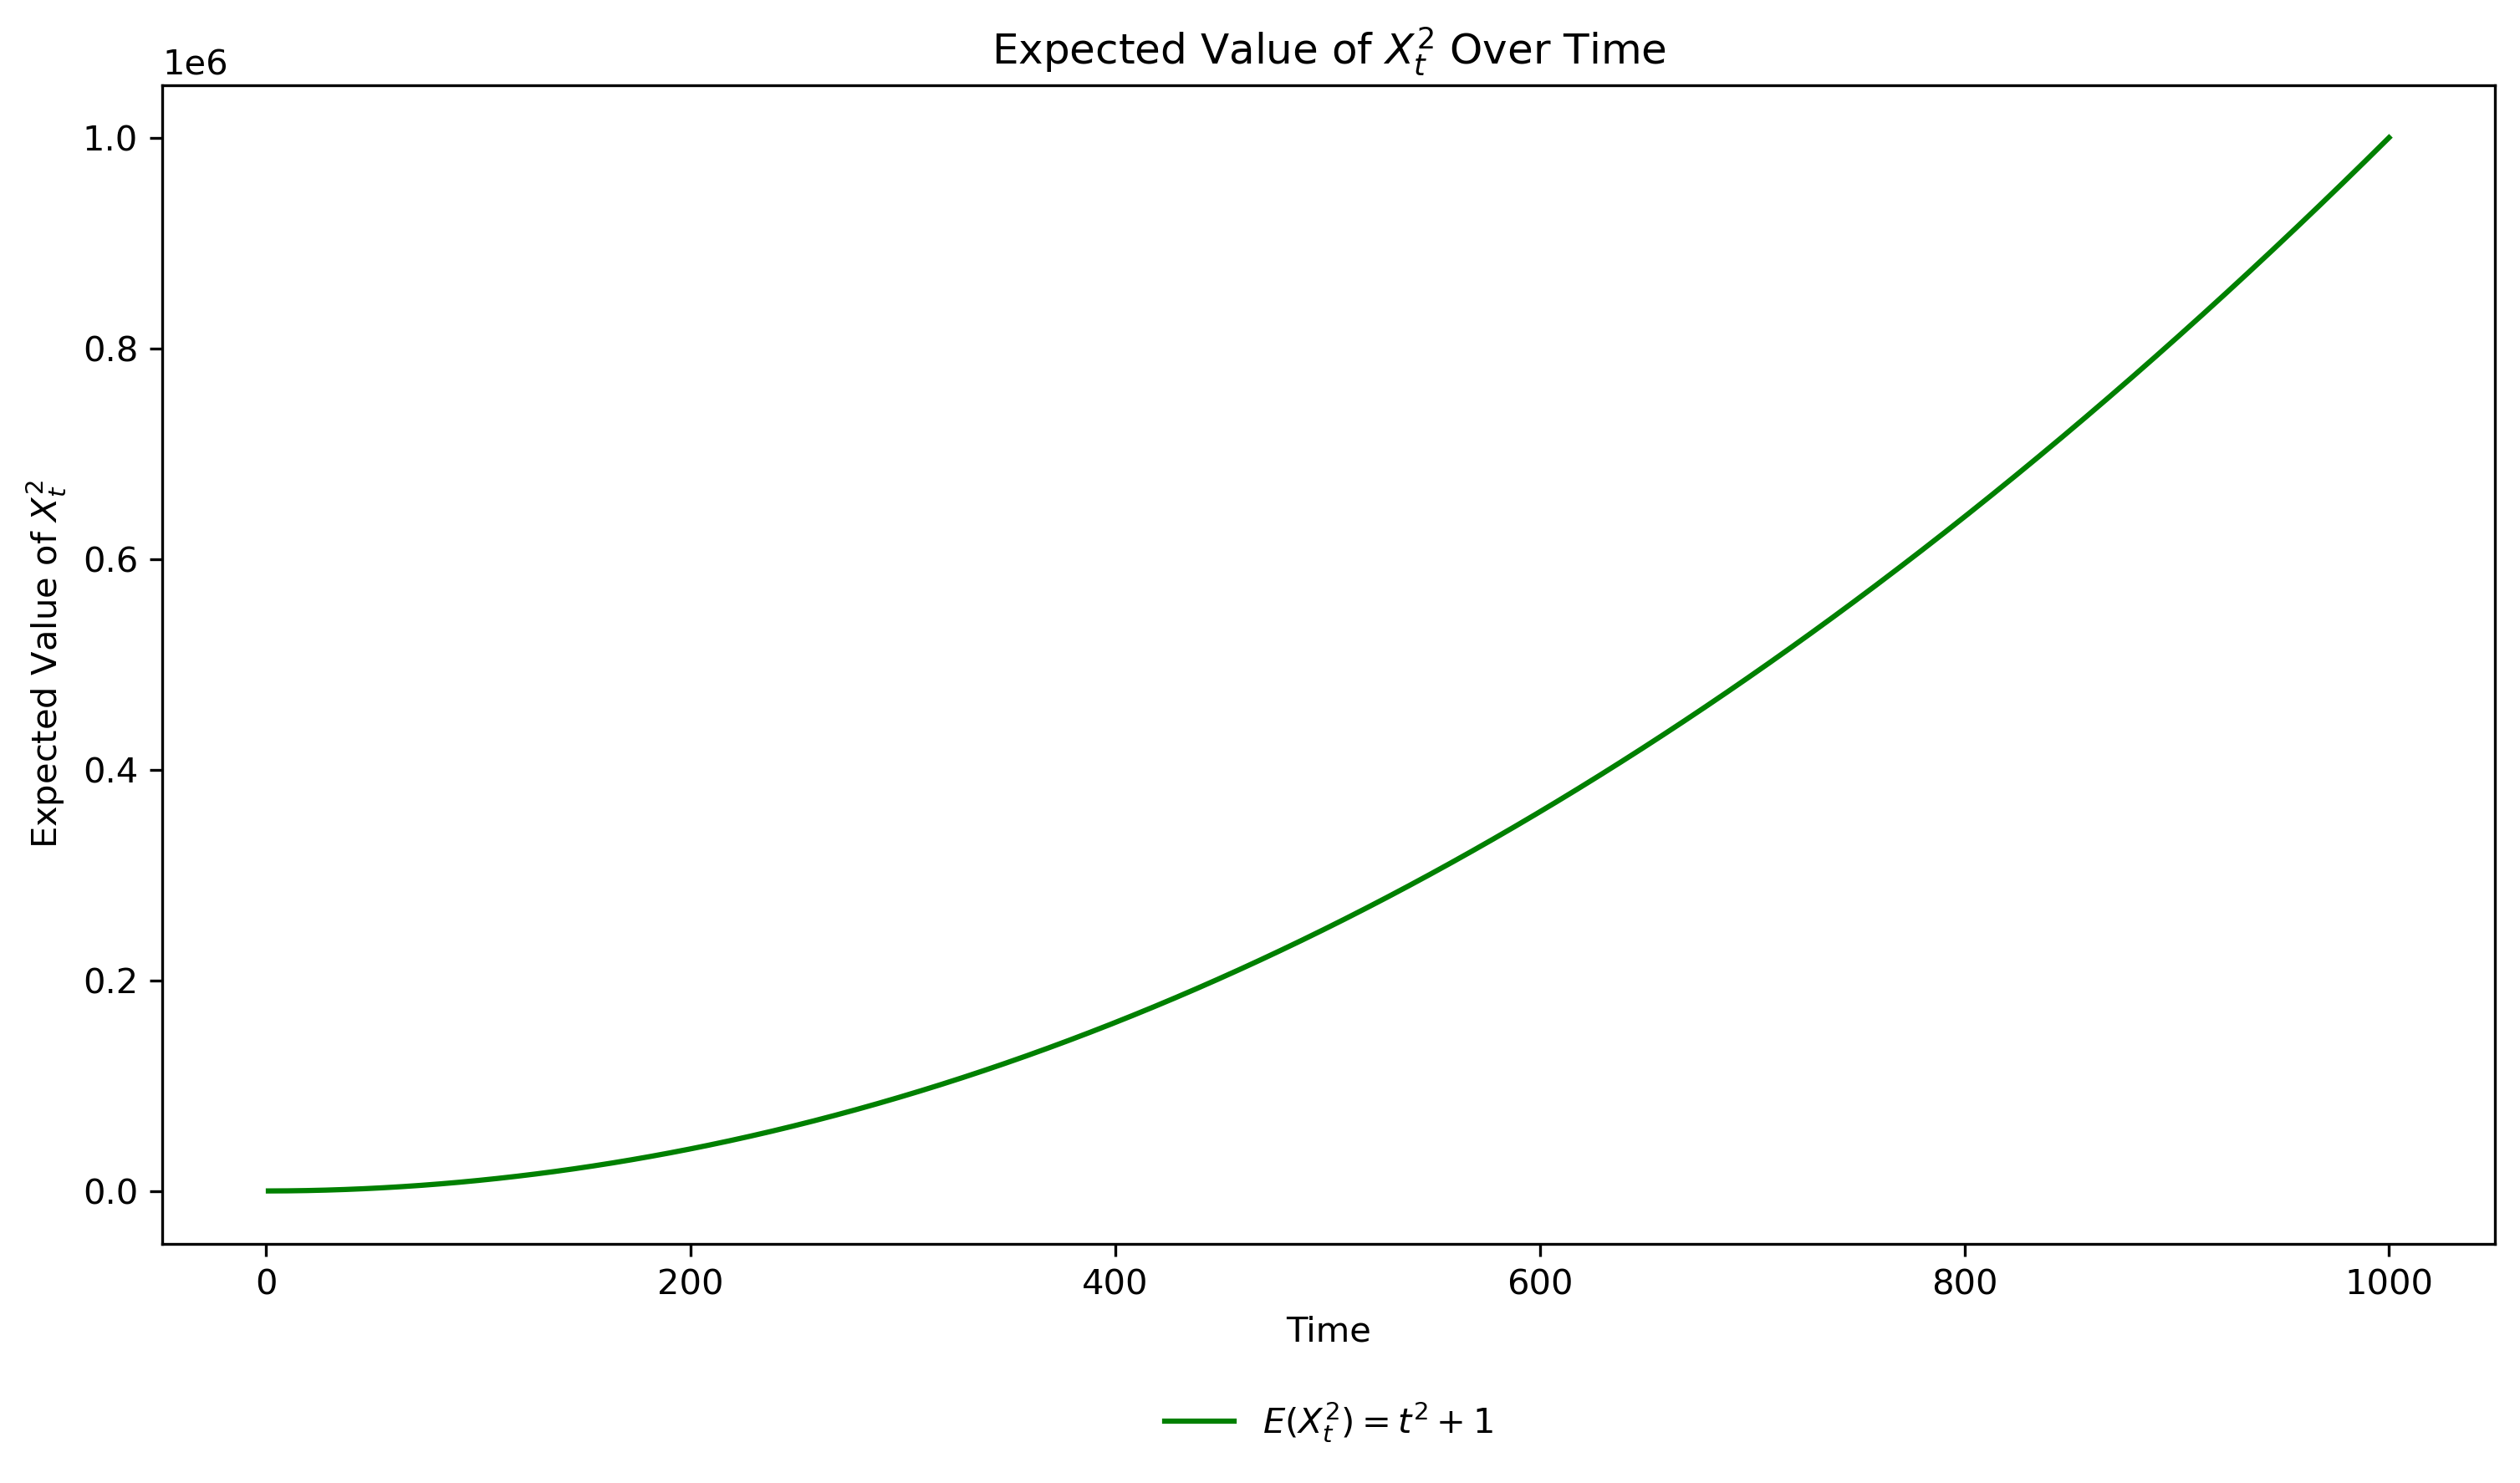

In [130]:
# Plot E(X_t^2) = t^2 + 1
e_x_squared = t_values**2 + 1
plt.figure(figsize=(12, 6), dpi=300, facecolor='none')
plt.plot(t_values, e_x_squared, label="$E(X_t^2) = t^2 + 1$", color='g')
plt.xlabel("Time")
plt.ylabel("Expected Value of $X_t^2$")
plt.title("Expected Value of $X_t^2$ Over Time")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), frameon=False)
plt.savefig("expected_x_squared.png", transparent=True, bbox_inches='tight')
plt.show()

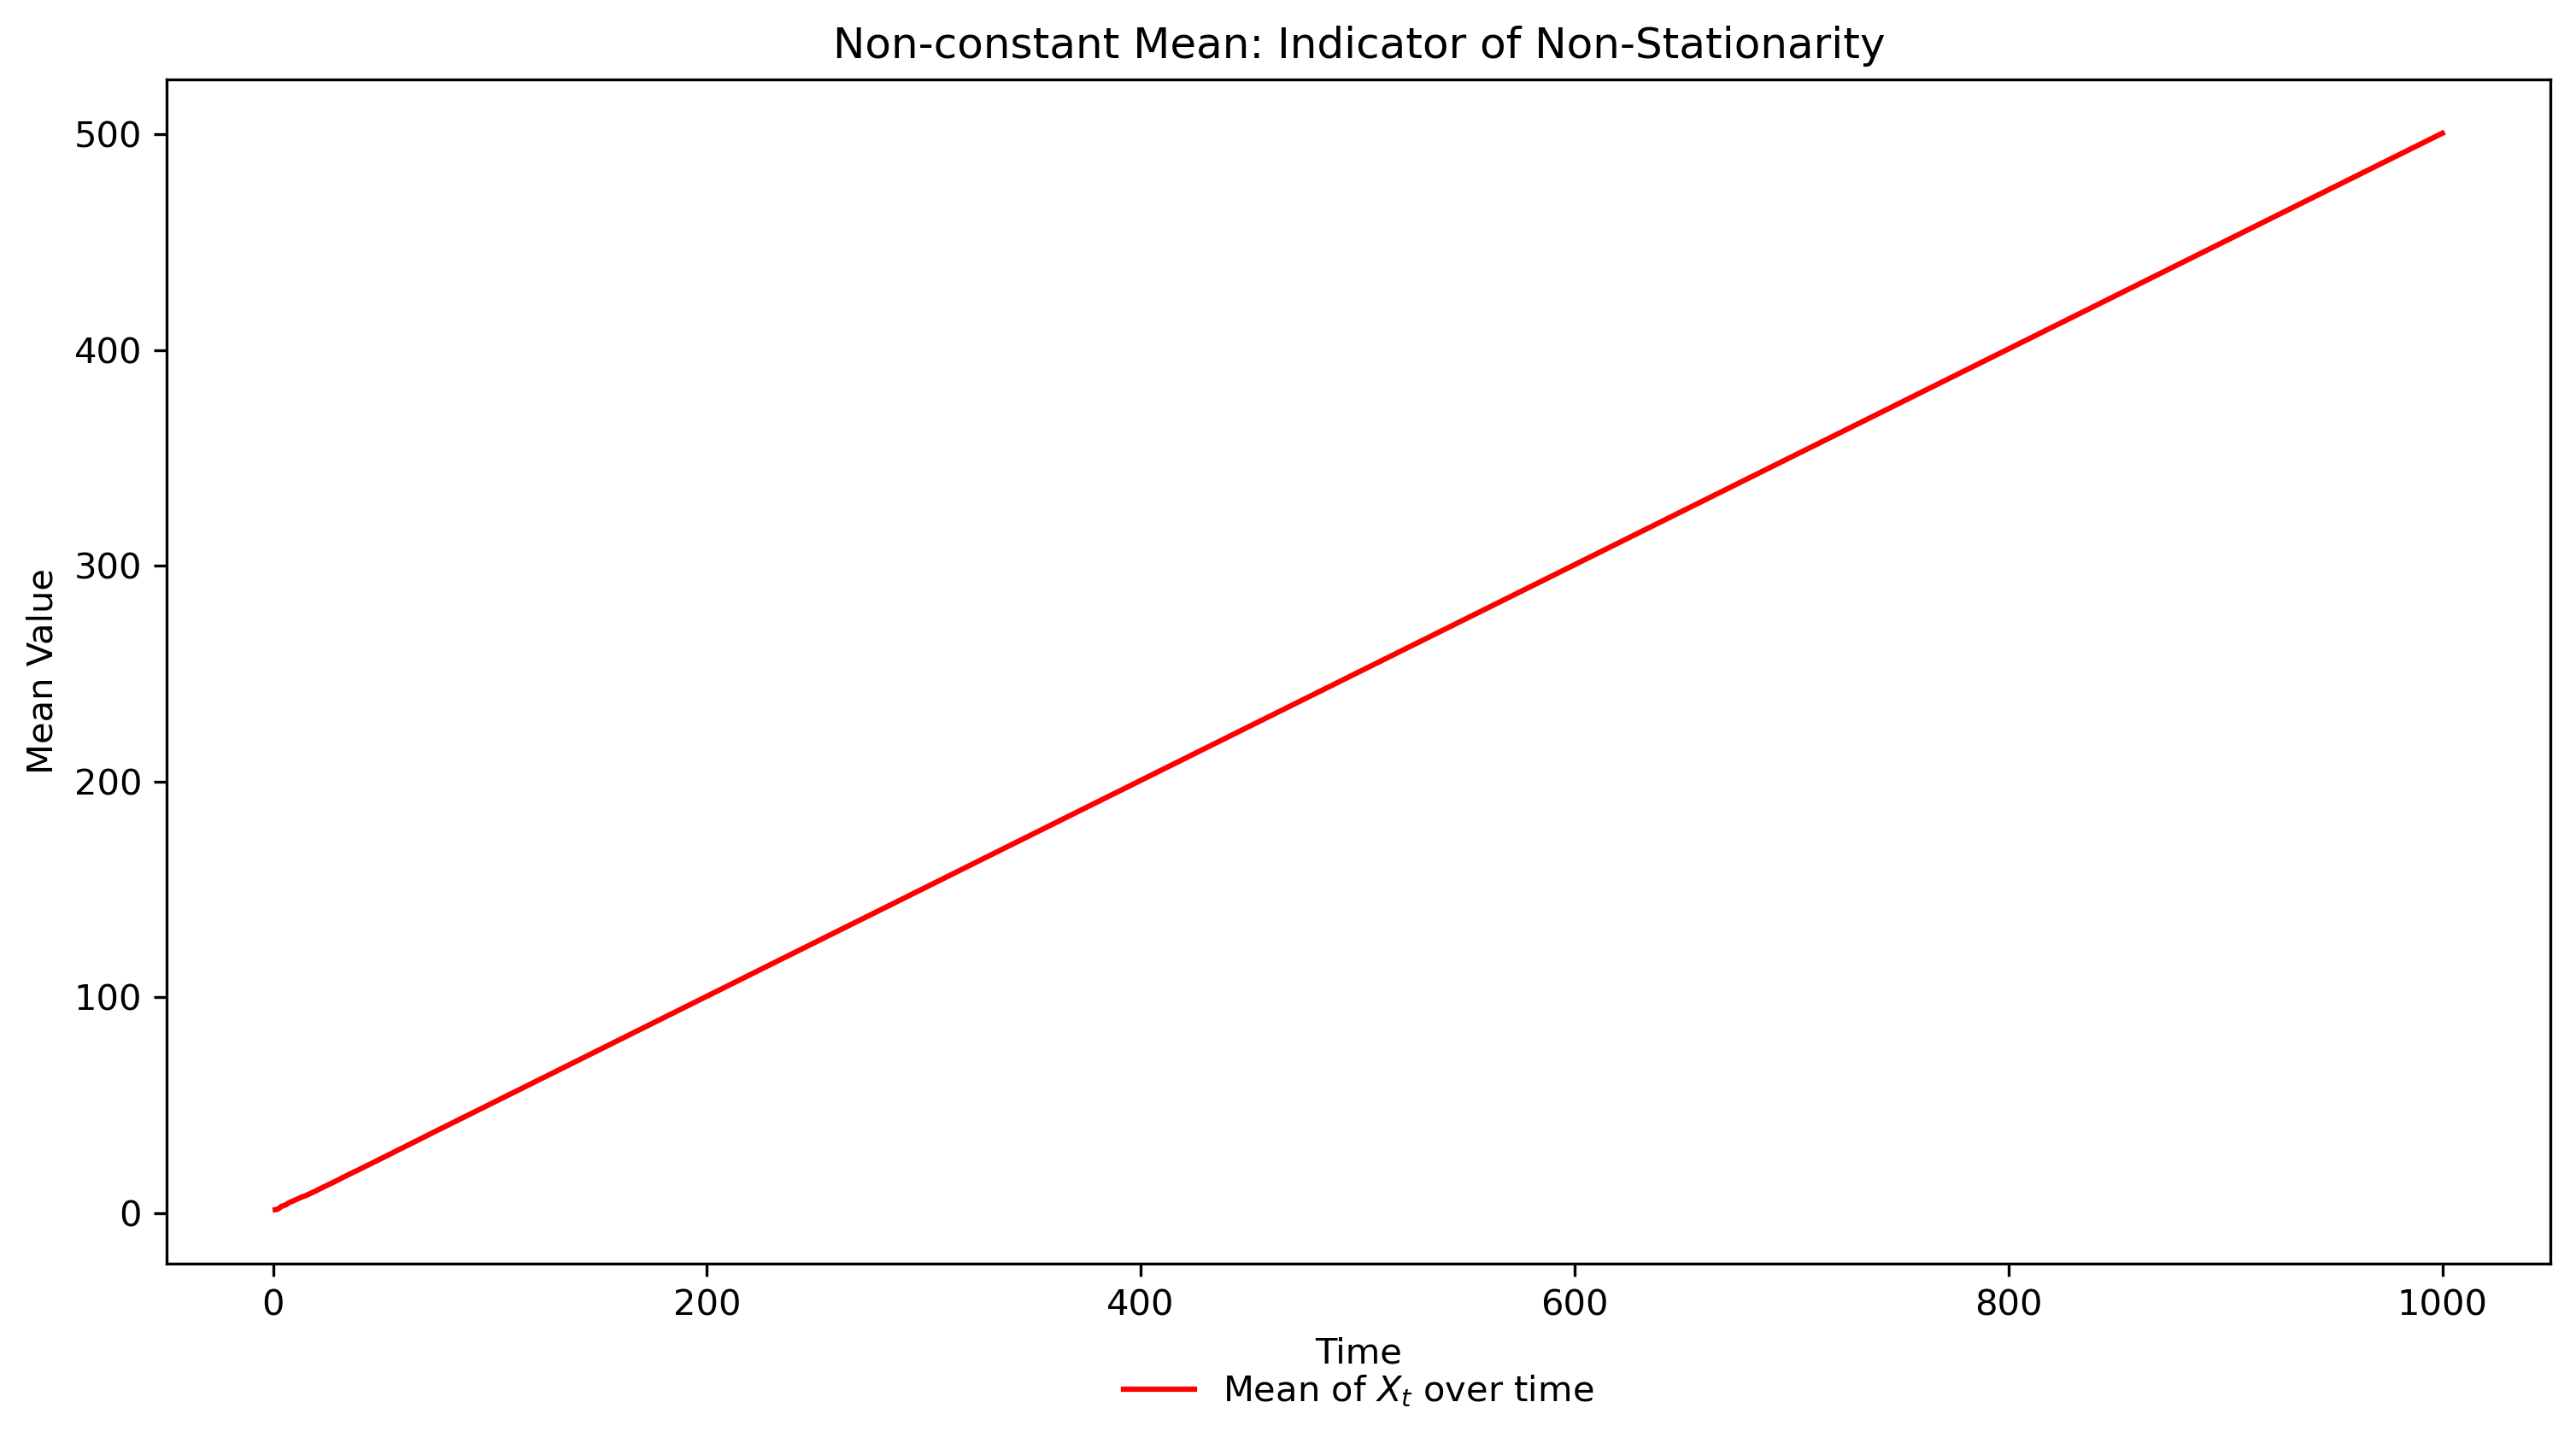

In [142]:
# Check mean over time (Non-stationarity check)
mean_values = np.cumsum(X_t) / np.arange(1, len(X_t)+1)
plt.figure(figsize=(12, 6), dpi=300, facecolor='none')
plt.plot(t_values, mean_values, label="Mean of $X_t$ over time", color='r')
plt.xlabel("Time")
plt.ylabel("Mean Value")
plt.title("Non-constant Mean: Indicator of Non-Stationarity")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), frameon=False)
plt.savefig("mean_check.png", transparent=True, bbox_inches='tight')
plt.show()

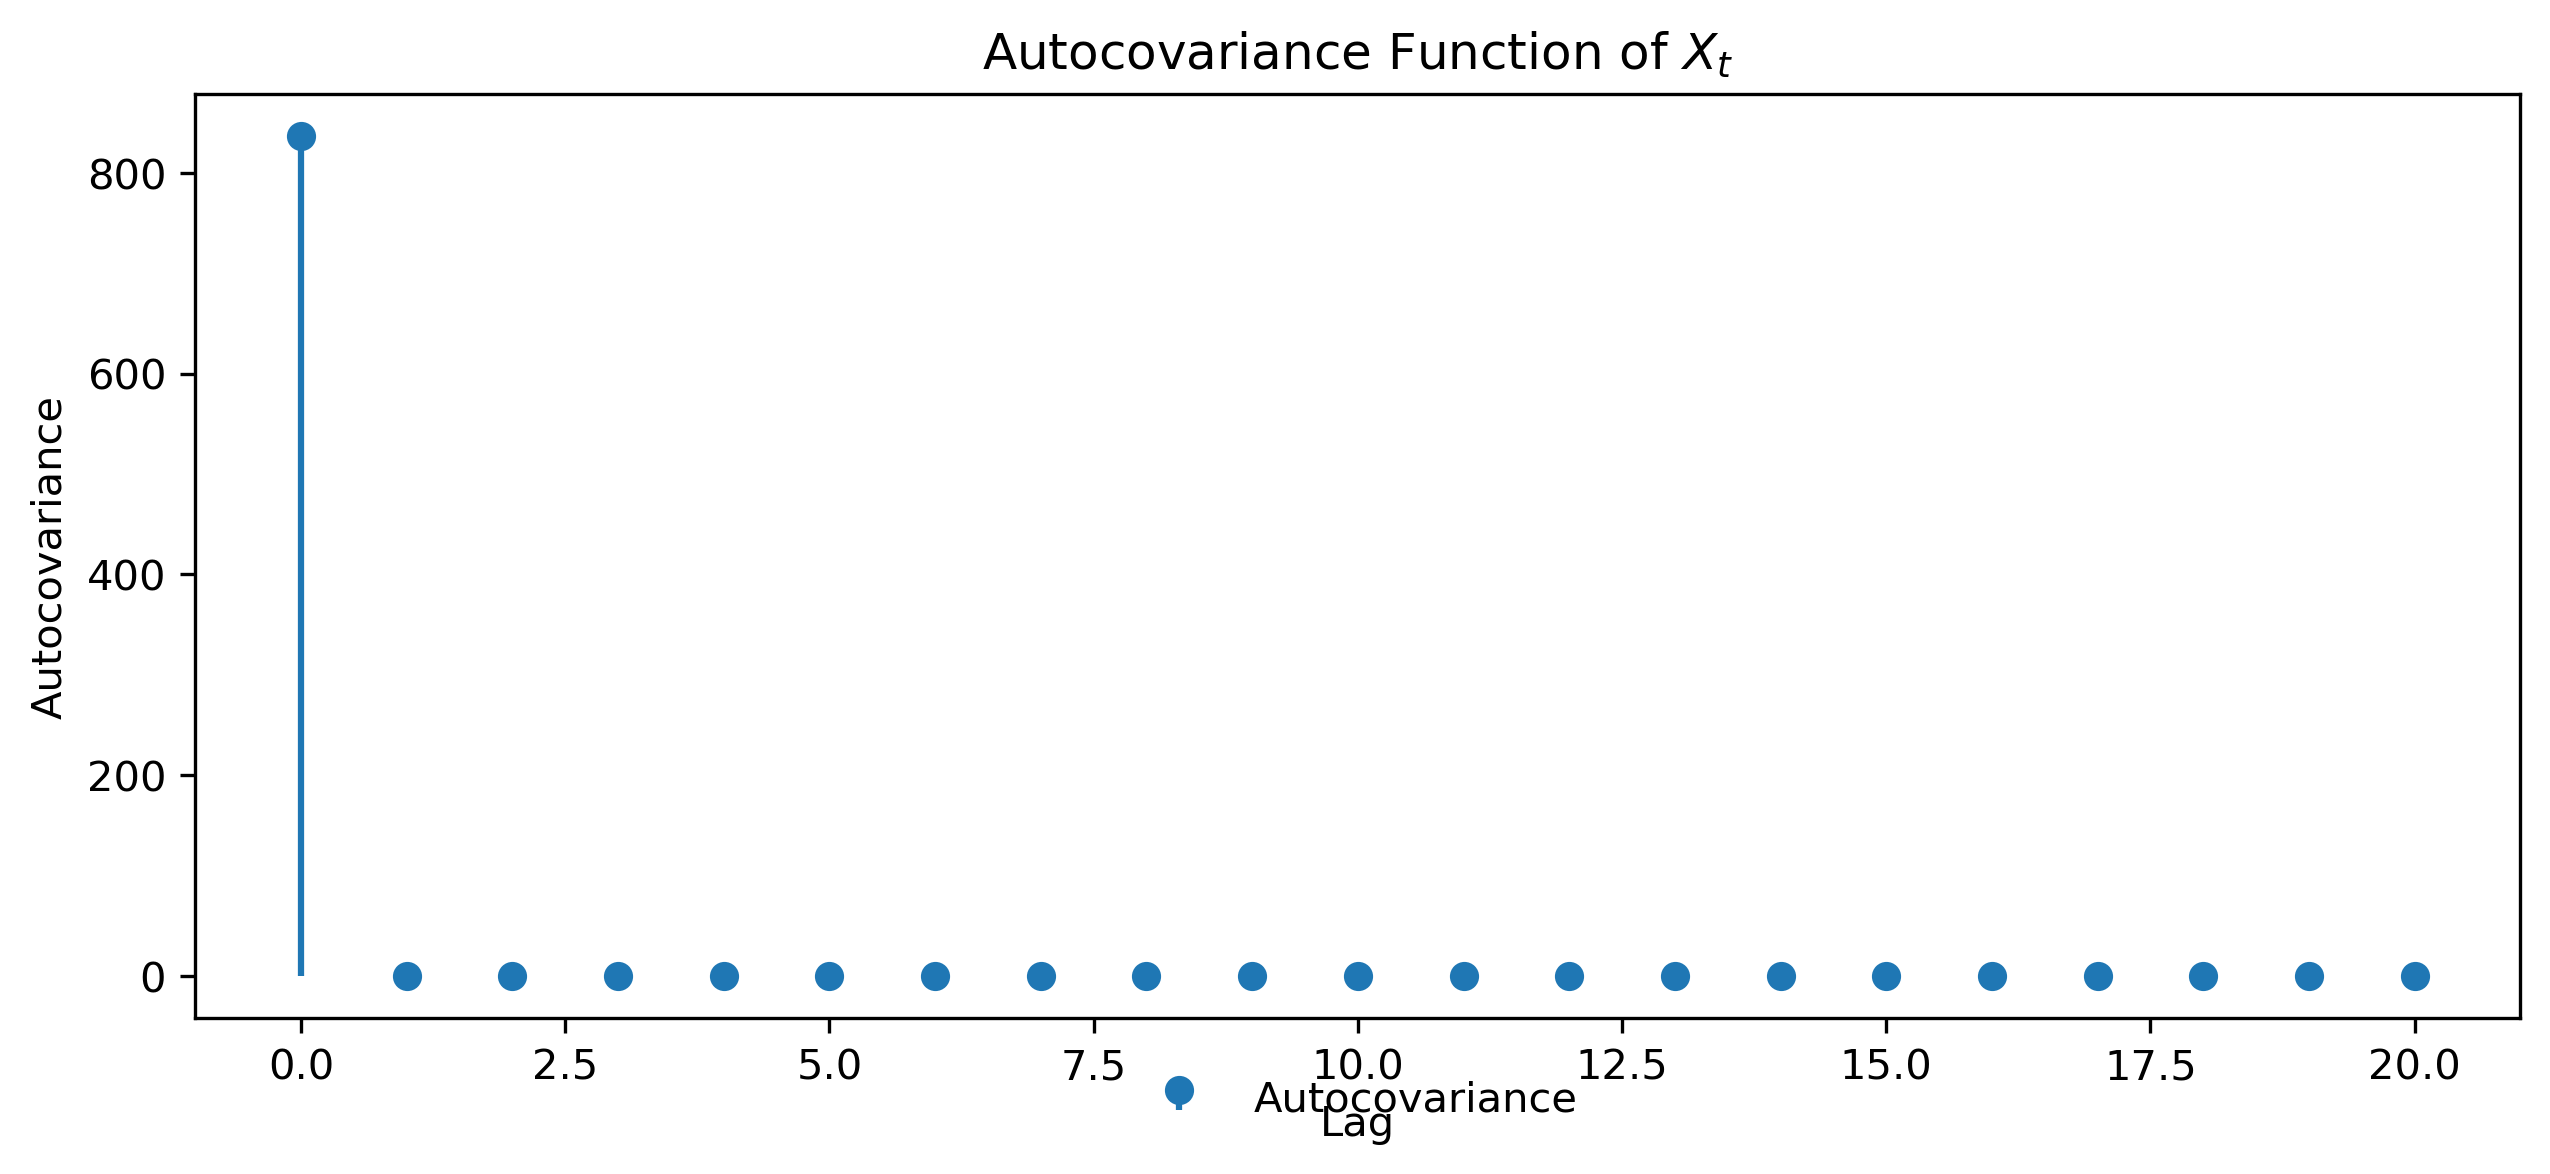

In [114]:

# Compute and plot autocovariance function
acf_values = sm.tsa.acf(X_t, nlags=20, fft=True)
autocov_values = np.zeros_like(acf_values)  # ACF should be zero except k=0
autocov_values[0] = np.var(X_t)  # Assign variance to lag 0

plt.figure(figsize=(10, 4), dpi=300, facecolor='none')
plt.stem(np.arange(len(autocov_values)), autocov_values, basefmt=" ")  # Ensure x-axis is integer values
plt.xlabel("Lag")
plt.ylabel("Autocovariance")
plt.title("Autocovariance Function of $X_t$")
plt.legend(["Autocovariance"], loc='lower center', bbox_to_anchor=(0.5, -0.15), frameon=False)
plt.savefig("autocovariance.png", transparent=True, bbox_inches='tight')
plt.show()